In [127]:
%matplotlib inline
import nltk
import string
from itertools import *
from pylab import *
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from __future__ import division
from nltk.book import text2

In [99]:
# selecting corpus - whitman leaves
corpus = text2
len(corpus)

141576

# Total unique words in the corpus
This will be accomplished with the use of python's set. The set function truncates all duplicates leaving unique words.

In [100]:
len(set(corpus))

6833

To ensure that the unique word count is correct I will remove any puncuation and recount the list.

In [101]:
# removing white spaces and stop words.


corpus_clean =  " ".join([word.lower() for word in corpus if word not in string.punctuation and 
               word.lower() not in stopwords.words('english') and
              word.lower().isalpha()])

#[''.join(c for c in s if c not in string.punctuation) for s in list(set(corpus))]
corpus_clean =  nltk.word_tokenize(corpus_clean)
len(corpus_clean)

54075

There are 54075 unique words in the corpus

# Taking the most common words, how many unique words represent half of the total words in the corpus?

In [102]:
# finding common words within the corpus
common_words = nltk.FreqDist(corpus_clean)
len(common_words)

6149

In [103]:

# checking to see if unique words makes up half of the words in the corpus
result = round(len(corpus_clean)/len(common_words),2)
result

8.79

Unique words indeed makes up more than half of the total words in the corpus

# Identify the 200 highest frequency words in this corpus.

In [104]:
top_200 = common_words.most_common(200)
top_200

[(u'elinor', 685),
 (u'could', 578),
 (u'marianne', 566),
 (u'mrs', 530),
 (u'would', 515),
 (u'said', 397),
 (u'every', 377),
 (u'one', 331),
 (u'much', 290),
 (u'must', 283),
 (u'sister', 282),
 (u'edward', 263),
 (u'mother', 258),
 (u'dashwood', 252),
 (u'well', 240),
 (u'time', 239),
 (u'know', 232),
 (u'jennings', 230),
 (u'willoughby', 216),
 (u'though', 216),
 (u'might', 215),
 (u'miss', 210),
 (u'think', 210),
 (u'never', 189),
 (u'nothing', 189),
 (u'lucy', 186),
 (u'thing', 185),
 (u'soon', 181),
 (u'mr', 178),
 (u'good', 177),
 (u'colonel', 176),
 (u'may', 175),
 (u'without', 174),
 (u'see', 173),
 (u'ever', 169),
 (u'john', 164),
 (u'house', 161),
 (u'say', 160),
 (u'first', 160),
 (u'little', 160),
 (u'however', 155),
 (u'two', 153),
 (u'day', 150),
 (u'great', 149),
 (u'brandon', 144),
 (u'lady', 142),
 (u'make', 140),
 (u'made', 138),
 (u'sure', 136),
 (u'ferrars', 130),
 (u'shall', 128),
 (u'heart', 127),
 (u'give', 126),
 (u'even', 125),
 (u'always', 124),
 (u'man', 12

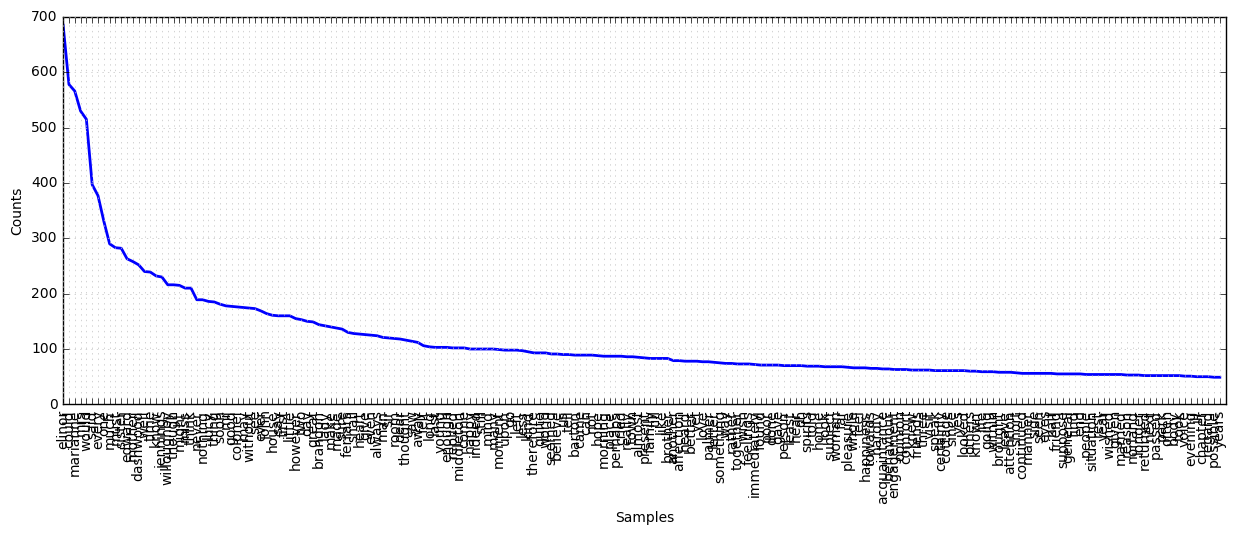

In [105]:

plt.figure(figsize=(15,5))
common_words.plot(200)

## Does the observed relative frequency of these words follow Zipf’s law?
I followed a walkthrough on how to calculate and create Zipf's plot

https://finnaarupnielsen.wordpress.com/2013/10/22/zipf-plot-for-word-counts-in-brown-corpus/

In [131]:
counts = array([i[1] for i in top_200])
tokens = array([i[0] for i in top_200])

In [132]:
ranks = arange(1,len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]

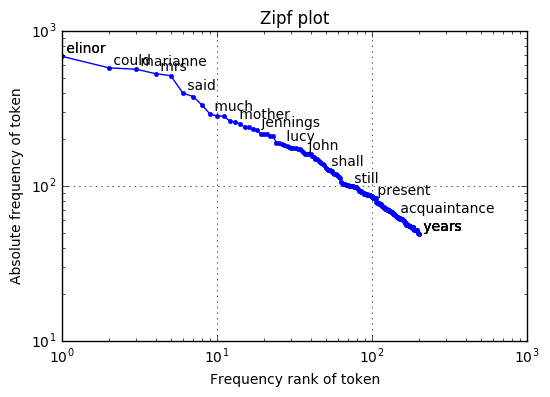

In [144]:
loglog(ranks, frequencies, marker=".")
title("Zipf plot")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)), 20).astype(int)-1):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

show()

These words follow Zipf's law since the frequency vs rank plot is fairly linear which supports that the frequency of the words in the corpus is proportional to it's rank.

The frequency of words in this corpus would differ from all words in all corpora because the text in the other corpora would be
related to the topic or context of the corpora